In [1]:
from commonfunctions import *
import numpy as np
import cv2
import math
%matplotlib inline
%load_ext autoreload
%autoreload 2

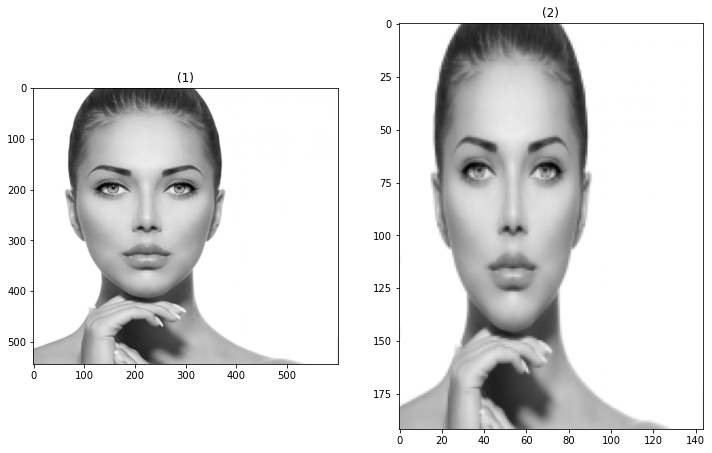

In [2]:
img = rgb2gray(io.imread('test_images\woman.jpg'))

resized = cv2.resize(img, (144,192), interpolation = cv2.INTER_AREA)
show_images([img,resized])

In [35]:
def HOG_descriptor(img):
    resized = cv2.resize(img, (144,192), interpolation = cv2.INTER_AREA)
    mag,angle=gradient(resized)
    print(resized.shape)
    
    #loop on mag and angle to get 16*16 cell
    windowsize_r =16
    windowsize_c =16
    bin_size=20
    mag_cells=[]
    ang_cells=[]

    
    #check code image on what`s app for efficient split
    
    #TODO make 2d
    
#     for r in range(0,mag.shape[0] - windowsize_r, windowsize_r):
#         temp_mag=[]
#         temp_angle=[]
#         for c in range(0,mag.shape[1] - windowsize_c, windowsize_c):  
            
#             temp_mag.append(mag[r:r+windowsize_r,c:c+windowsize_c])
#             temp_angle.append(angle[r:r+windowsize_r,c:c+windowsize_c])
        
#         mag_cells.append(temp_mag)
#         ang_cells.append(temp_angle)  

    #get 16*16 cells
    mag_cells=cut_image(mag,windowsize_r,windowsize_c)
    ang_cells=cut_image(angle,windowsize_r,windowsize_c)
    
    print(mag_cells.shape)
    show_images([mag_cells[1][0],mag_cells[1][1],mag_cells[1][2],mag_cells[1][3]])
    
    #histogram of each cell
    hist=np.zeros((mag_cells.shape[0], mag_cells.shape[0],180//bin_size))
    for r in range(mag_cells.shape[0]):
        for  c in range(mag_cells.shape[1]):
            hist[r][c]=HOG_histogram(mag_cells[r][c],ang_cells[r][c], bin_size)
    
    norm_hist=[]
    for r in range(hist.shape[0]-1):
        for  c in range(hist.shape[1]-1):
            temp=hist[r:r+2, c:c+2].reshape(-1)
            temp/=np.linalg.norm(temp)
            norm_hist+=list(temp)
    norm_hist=np.asarray(norm_hist)        
    print('size of hist',hist.shape)
    print('size of norm_hist',norm_hist.shape)
   
    
 
    

In [4]:
def cut_image(img,windowsize_r,windowsize_c):
    tiles=[]
    img_r=img.shape[0]
    img_c=img.shape[1]
    tiles=img.reshape(img_r//windowsize_r,
                      windowsize_r,
                     img_c//windowsize_c,
                     windowsize_c)
    tiles=tiles.swapaxes(1,2)
    return tiles

In [5]:
def HOG_histogram(mag,angle,bin_size=20):
    hist=np.zeros(int(180/bin_size))
    low_bins=20*(angle//20)
    
    high_bins=20+low_bins
    
    ## weights
    weight_low_bin=(abs(high_bins-angle)/20)*mag
    weight_high_bin=(abs(angle-low_bins)/20)*mag
    
    
    high_bins=high_bins%180
    for i in range(hist.shape[0]):
        
        votes_low=np.sum(weight_low_bin[(low_bins//20)==i])
        votes_high=np.sum(weight_high_bin[(high_bins//20)==i])
        hist[i]=votes_low+votes_high
    
        
    print(np.sum(mag))

    print(np.sum(hist))

    
    
    

In [6]:
#cell is a matrix 8x8
def gradient(img):
    img=np.float32(img) / 255.0
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)
    mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

    show_images([gx,gy,mag,angle],["gx","gy","mag","angle"])
#     print("mag",np.sum(mag))
    return mag,angle%180

    
    

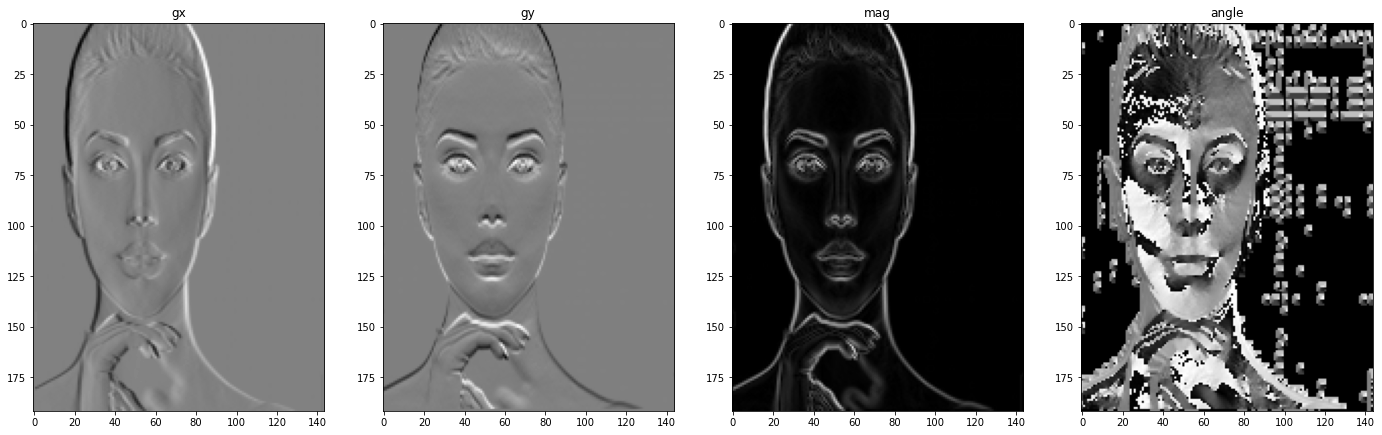

(192, 144)
(12, 9, 16, 16)


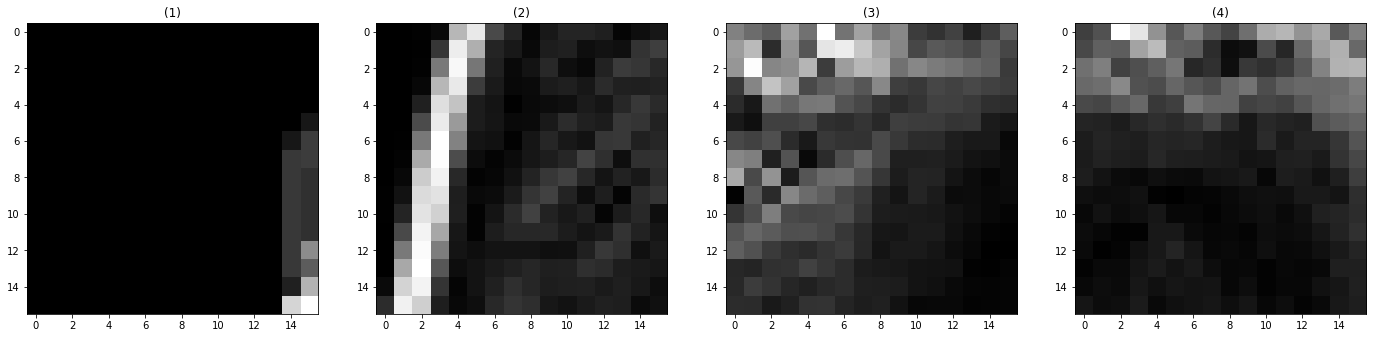

0.00011032645
0.0001103264511357338
0.12779489
0.12779489436070435
0.07280705
0.07280704705044627
0.08157966
0.0815796609967947
0.09454746
0.09454745007678866
0.058430843
0.058430843986570835
0.0016005703
0.0016005701836547814
0.0012437289
0.0012437289115041494
0.0015151636
0.0015151636180235073
6.1663806e-05
6.166380643435332e-05
0.16346207
0.16346207854803652
0.071150914
0.07115091010928154
0.0347372
0.03473719861358404
0.08720557
0.08720556390471756
0.12198936
0.12198935440392233
0.0014667185
0.00146671844413504
0.0008604389
0.0008604389076936059
0.0011760355
0.0011760354245780036
0.005375758
0.005375757922138291
0.16379358
0.16379358258018328
0.02741008
0.027410081495560235
0.00878708
0.008787079714238644
0.048442136
0.04844213707110612
0.1445401
0.14454012420901563
0.0026751354
0.0026751354089356028
0.002387124
0.0023871239318395965
0.0022800486
0.0022800486913183704
0.011468677
0.011468676020740531
0.17376433
0.1737643416854553
0.1471084
0.14710842119529843
0.06595659
0.065956593

<ipython-input-33-d564373b5504>:46: RuntimeWarning: invalid value encountered in true_divide
  temp/=np.linalg.norm(temp)


In [34]:
HOG_descriptor(img)